<a href="https://colab.research.google.com/github/Radhin-Krishna-R/Customer-complaint-analysis/blob/main/customer_compliant_analysis_data_analysis_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train=pd.read_csv('train_cleaned.csv')
test=pd.read_csv('test_cleaned.csv')

In [13]:
train.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Year,Days_Held,Week_Received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653.0,14,10,2015,0,2
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613.0,26,4,2015,0,4
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394.0,20,12,2013,14,3
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134.0,3,3,2016,1,1
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613.0,30,1,2015,0,5


In [14]:
#store data of disputed people into the “disputed_cons” variable for future tasks
disputed_cons=train[train['Consumer disputed?']=='Yes']

In [15]:
disputed_cons.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Year,Days_Held,Week_Received
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613.0,26,4,2015,0,4
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613.0,30,1,2015,0,5
5,2014-01-10,Credit card,APR or interest rate,TD Bank US Holding Company,FL,33180,Web,2014-01-15,Closed with explanation,Yes,Yes,663281.0,10,1,2014,5,2
7,2015-12-07,Credit card,Payoff process,Capital One,IL,60610,Web,2015-12-07,Closed with explanation,Yes,Yes,1685130.0,7,12,2015,0,1
8,2012-04-05,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,18337,Web,2012-04-05,Closed with relief,Yes,Yes,44225.0,5,4,2012,0,1


In [3]:
train.dtypes

,0
Date received,object
Product,object
Issue,object
Company,object
State,object
ZIP code,object
Submitted via,object
Date sent to company,object
Company response to consumer,object
Timely response?,object


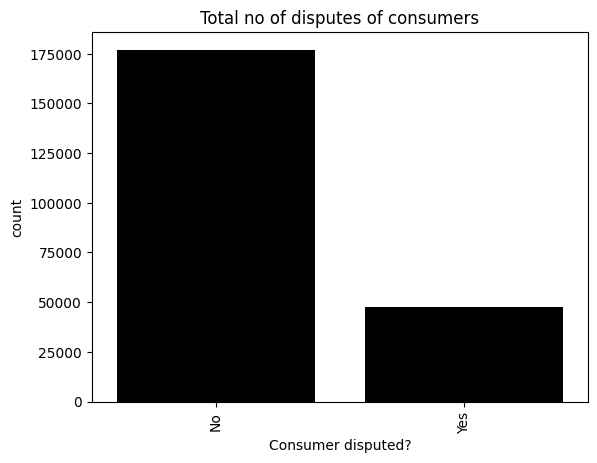

In [30]:
#Plot bar graph of the total no of disputes of consumers
sns.countplot(x='Consumer disputed?',data=train,color="black")
plt.xticks(rotation=90)
plt.title('Total no of disputes of consumers')
plt.show()

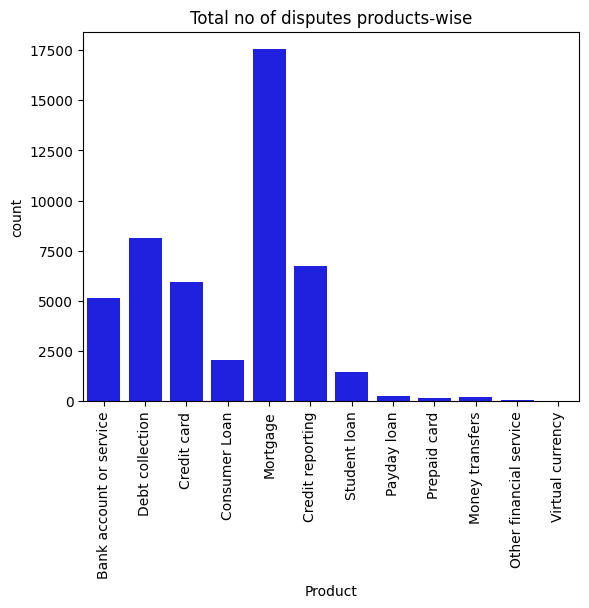

In [32]:
#plot bar graph of the total no of disputes products-wise
sns.countplot(x='Product',data=disputed_cons,color="blue")
plt.xticks(rotation=90)
plt.title('Total no of disputes products-wise')
plt.show()

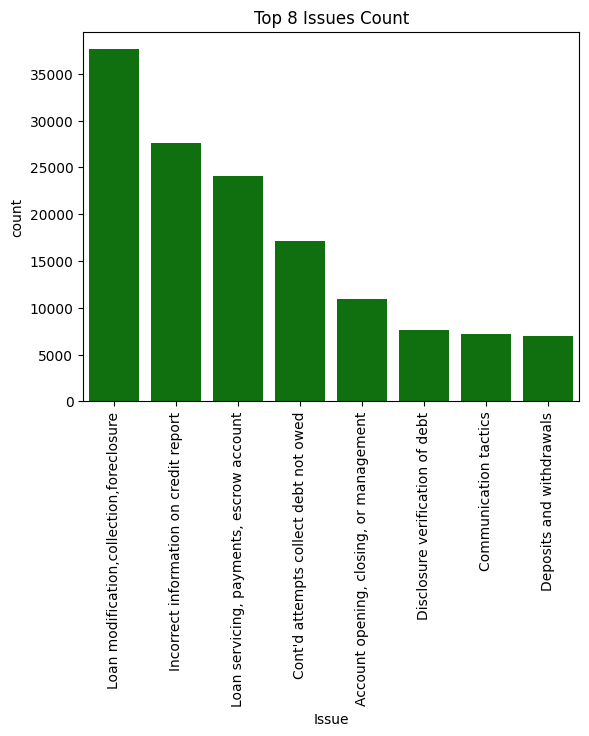

In [37]:
#Plot bar graph of the total no of disputes with Top Issues by Highest Disputes
top_8_issues = train['Issue'].value_counts().nlargest(8).index
top_issues = train[train['Issue'].isin(top_8_issues)]

sns.countplot(data=top_issues, x='Issue', order=top_8_issues,color="green")
plt.xticks(rotation=90)
plt.title('Top 8 Issues Count')
plt.xticks(rotation=90)
plt.show()

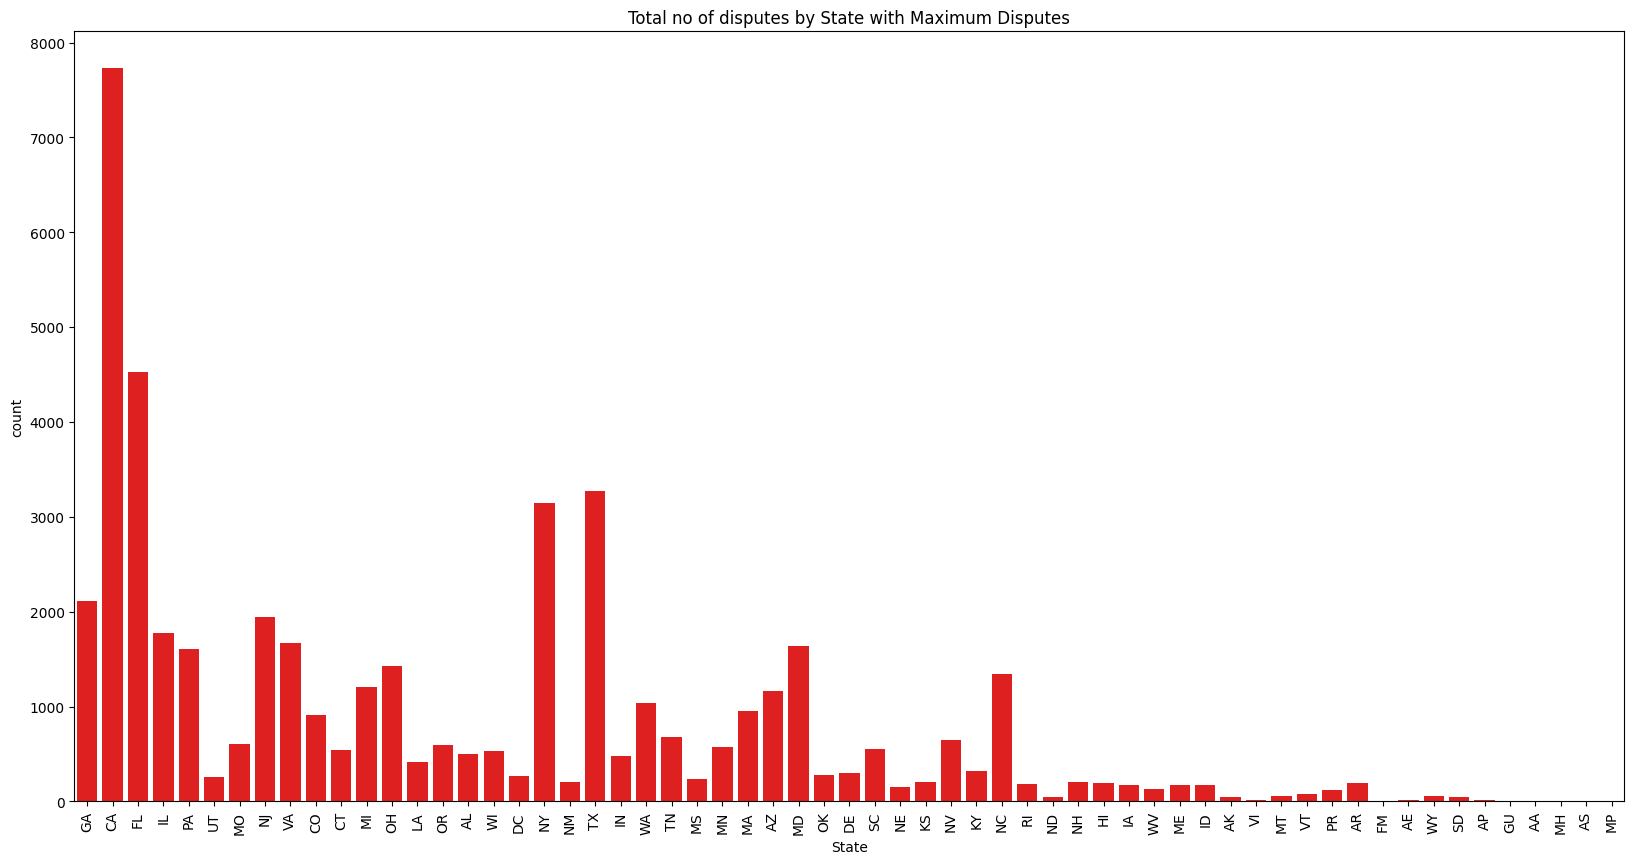

In [40]:
#Plot bar graph of the total no of disputes by State with Maximum Disputes
plt.figure(figsize=(20,10))
sns.countplot(x='State',data=disputed_cons,color="red")
plt.xticks(rotation=90)
plt.title('Total no of disputes by State with Maximum Disputes')
plt.show()

Text(0.5, 1.0, 'Total no of disputes Submitted Via different source')

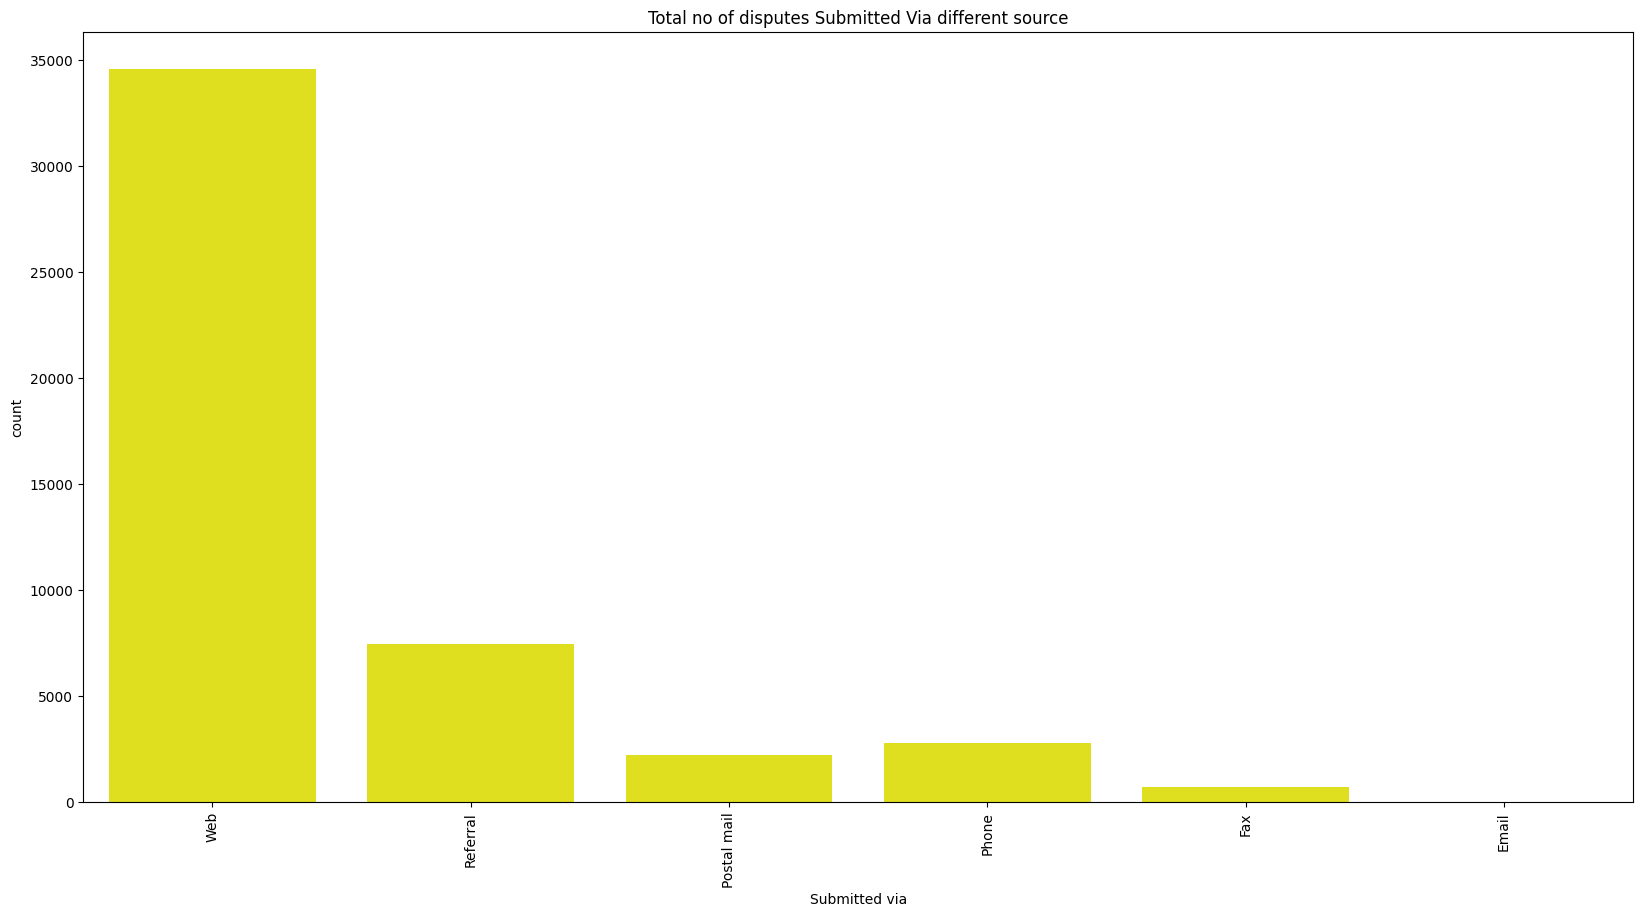

In [41]:
#Plot bar graph of the total no of disputes Submitted Via different source
plt.figure(figsize=(20,10))
sns.countplot(x='Submitted via',data=disputed_cons,color="yellow")
plt.xticks(rotation=90)
plt.title('Total no of disputes Submitted Via different source')
plt.show()

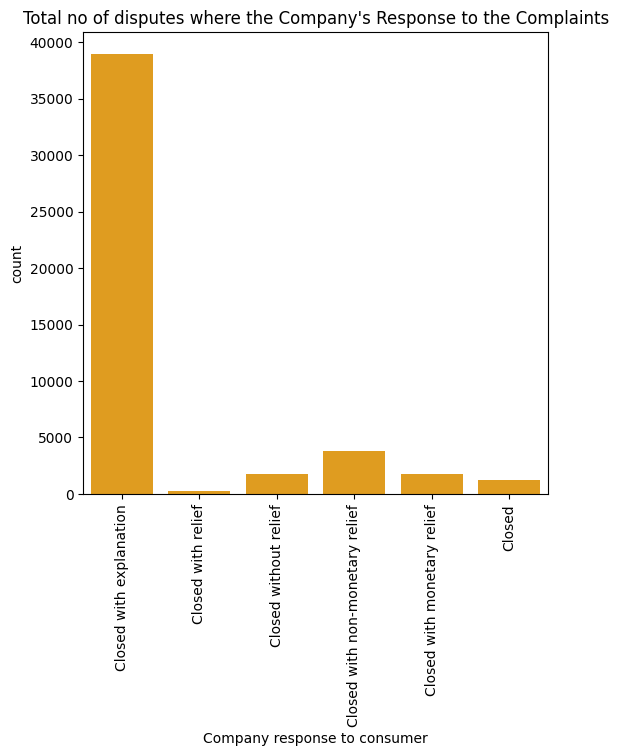

In [51]:
#Plot bar graph of the total no of disputes where the Company's Response to the Complaints
plt.figure(figsize=(6,6))
sns.countplot(x='Company response to consumer',data=disputed_cons,color="orange")
plt.title('Total no of disputes where the Company\'s Response to the Complaints')
plt.xticks(rotation=90)
plt.show()

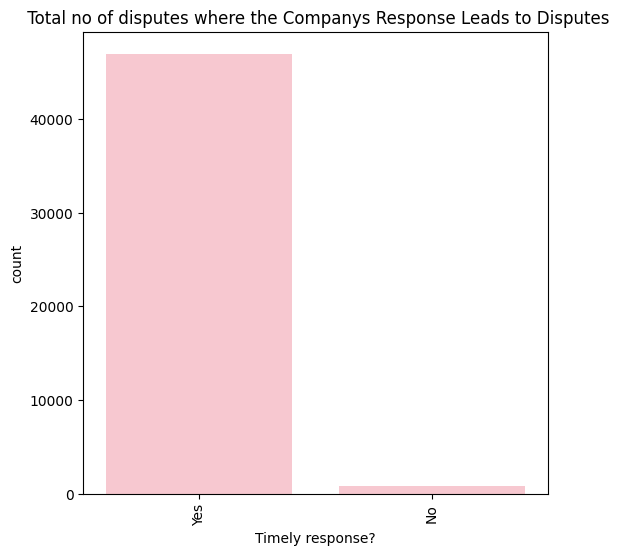

In [50]:
#plot bar graph of the total no of disputes where the Company's Response Leads to Disputes
plt.figure(figsize=(6,6))
sns.countplot(x='Timely response?',data=disputed_cons,color="pink")
plt.xticks(rotation=90)
plt.title(' Total no of disputes where the Companys Response Leads to Disputes')
plt.show()

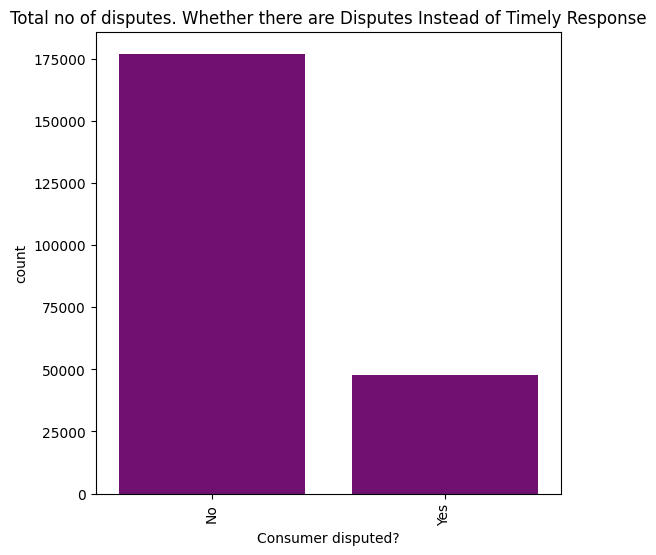

In [52]:
#Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response
plt.figure(figsize=(6,6))
sns.countplot(x='Consumer disputed?',data=train,color="purple")
plt.title('Total no of disputes. Whether there are Disputes Instead of Timely Response')
plt.xticks(rotation=90)
plt.show()

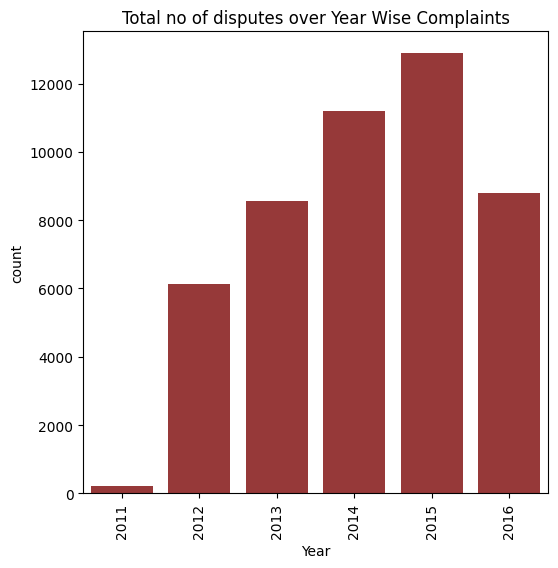

In [54]:
#Plot bar graph of the total no of disputes over Year Wise Complaints
plt.figure(figsize=(6,6))
sns.countplot(x='Year',data=disputed_cons,color="brown")
plt.xticks(rotation=90)
plt.title('Total no of disputes over Year Wise Complaints')
plt.show()

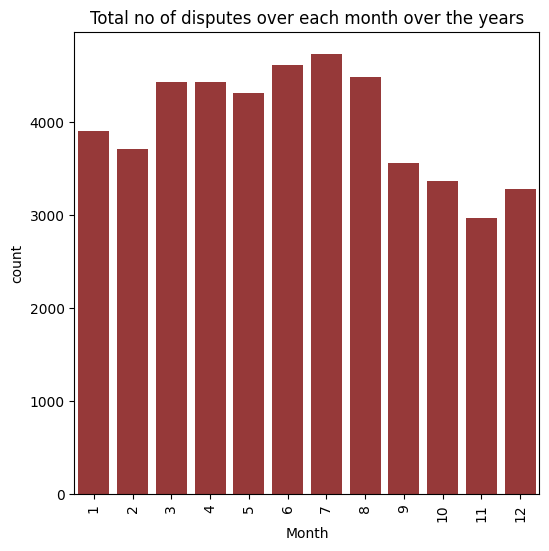

In [55]:
#Plot bar graph of the total no of disputes over Month Wise Complaints
plt.figure(figsize=(6,6))
sns.countplot(x='Month',data=disputed_cons,color="brown")
plt.xticks(rotation=90)
plt.title('Total no of disputes over each month over the years')
plt.show()

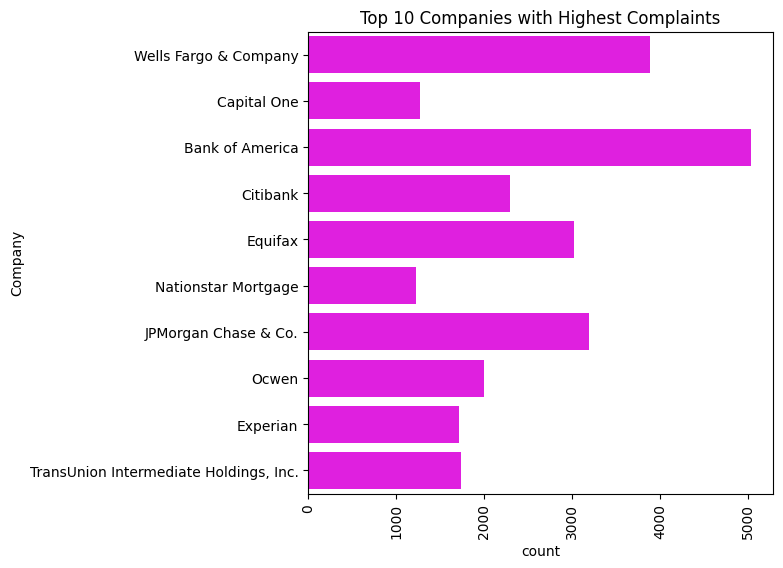

In [61]:
#Plot horizontal bar graph of Top Companies with Highest Complaints
top_10_companies = disputed_cons['Company'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 companies
top_10_disputed_cons = disputed_cons[disputed_cons['Company'].isin(top_10_companies)]

# Plot the countplot
plt.figure(figsize=(6, 6))
sns.countplot(y='Company', data=top_10_disputed_cons, color="magenta")
plt.xticks(rotation=90)
plt.title('Top 10 Companies with Highest Complaints')
plt.show()


In [62]:
train.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Day',
       'Month', 'Year', 'Days_Held', 'Week_Received'],
      dtype='object')

In [64]:
#Converte all negative days held to zero (it is the time taken by the authority that can't be negative)
train['Days_Held']=np.where(train['Days_Held']<0,0,train['Days_Held'])
